#### All About Regressions
Linear regression is one of the essential parametric models in statistical learning. We have discussed three types of regression models: ordinary least squares (OLS), ridge regression, and lasso regression. OLS can be learned as long as the training features are linearly independent. Ridge regression adopts L2 regularization for model learning, and Lasso adopts L1 regularization. Surprisingly, the prediction accuracy of the three types of models may be heavily influenced by how we preprocess the features and outcome values. We are going to explore these aspects in this homework.

When preparing the training and testing datasets, we can choose to apply different preprocessing procedures. For the outcome values (i.e.,  y ), we can choose to shift the mean (in training data) to zero by computing the mean of  y ,  y¯train , in the training data and subtract  y¯train  from all outcome values in the training and testing data. This will give us a zero mean for the outcome values of training data, and, in most cases, the mean of outcome values in testing data should be very close to zero. We will refer this procedure as "de-mean" in the subsequent discussion.

To sum up the two preprocessing procedures for outcome values  y , we can choose to (1) keep the original numerical value (referred to as "keep"), or (2) de-mean. If the de-meaned  y  is used in model training, then we need to add  y¯train  to the prediction. The reason is obvious: we need to shift the mean back to  y¯train .

We now turn our attention to the feature values. The feature can have continuous values or binary values. For continuous-valued features, we can standardize the feature values by subtracting the mean and then dividing the residuals with their standad deviation. This shifts the mean of the feature to zero and scales the feature to have a unit variance in the training data. You should apply the same procedure for test data using the mean and standard deviation computed from training data.

If the feature is binary (i.e., x_binary in the table below), then we usually do not apply feature standardization. However, you may choose do standardize binary feature or simply do this by accident.

To explore the effects of these pre-processing procedures on prediction performance, we are going to compute the RMSE of the following 9 cases:

|Case|Method|x_continue|x_binary|y|
|---|---|---|---|---|
|1|ymean|not used|not used|keep|
|2A|OLS|keep|keep|keep|
|2B|OLS|keep|keep|de-mean|
|2C|OLS|std.|std.|de-mean|
|3A|Ridge|keep|keep|keep|
|3B|Ridge|std.|keep|de-mean|
|3C|Ridge|keep|keep|de-mean|
|3D|Ridge|std.|std.|de-mean|
|4|Lasso|std.|keep|de-mean|

Each case use a different model and data preprocessing procedures. The "ymean" method in Case 1 simply uses the mean of  y  in the training data to do prediction. Cases 2A to 2C use OLS to train and predict. They are different in terms of how we preprocess feature values and outcome values. For example, Case 2C standardize all features (continuous-valued or binary) and use de-meaned y to train and predict outcome values. Cases 3A to 2D adopt Ridge regressiona and Case 4 adopts the Lasso regression. A constant term should be included in OLS, Ridge and Lasso regressions.

You are allowed to use learning models in sklearn.linear_model in this homework.

Note that in some of this homework questions we compute and report the RMSE with respect to different hyperparameter values. We adopted this setting to simply the questions. You should not tune hyperparameters using test data in a real life scenario.

Dataset
We are going use a dataset that predict the outcome values using 44 features. This dataset was collected from a social media platform. The goal is to understand how a post on a company fan page reach the consumers. The first variable, life_post_consumer, is the number of people who clicked anywhere in the post. We want to construct a model that can predict this variable using the value of other variables.

The meaning of these variables are briefly described below.

|Variable|Description|
|---|---|
|life_post_consumer|The number of people who clicked anywhere in the post.|
|comp_page_like|The number of likes on the company’s fan page.|
|Paid|If the company paid to Facebook for advertising (1=yes).|
|life_post_reach|The number of people who saw a page post (unique users).|
|life_post_impression_liked|Total number of impressions just from people who have liked a |page.
|life_post_reach_liked|The number of people who saw a page post because they have liked that page (unique users).|
|comment|Number of comments on the publication.|
|like|Number of “Likes” on the publication.|
|share|Number of times the publication was shared.|
|type_link|Type of content is link sharing.|
|type_status|Type of content is status updates.|
|type_video|Type of content is video sharing. Note: photo sharing is represented as type_link=0 and type_status=0 and type_video=0.
|cat2|Type of content is product (direct advertisement, explicit brand content).|
|cat3|Type of content is inspiration (non-explicit brand related content). Note: action (special offers and contests) is represented as cat2=0 and cat3=0.|
|month1 to month11|Posting month is Jan., Feb.,…, Nov. Note: Dec. is represented as month1=month2=…=month11=0|
|dow1 to dow6|Day of week is Sunday, Monday, …, Friday.|
|hour2 to hour14|Posting hour is 2 to 14.|

The data file df1_train.csv contain the training data (outcome and features); df1_test1.csv contain the feature values of the testing data, and df1_test1y.csv contain the outcome values of the testing data.



-------
### Solution

-------
#### Q1
**Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.**

Check out the summary statistics:


,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,type_video,cat2,cat3,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,dow1,dow2,dow3,dow4,dow5,dow6,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
mean,810.340000,122890.625000,0.260000,13436.855000,17477.350000,6585.952500,6.855000,169.07250,25.485000,0.037500,0.08250,0.017500,0.260000,0.295000,0.055000,0.045000,0.080000,0.095000,0.08250,0.107500,0.100000,0.065000,0.062500,0.120000,0.097500,0.147500,0.140000,0.130000,0.122500,0.132500,0.167500,0.080000,0.210000,0.070000,0.022500,0.030000,0.032500,0.022500,0.062500,0.150000,0.092500,0.055000,0.102500,0.02500
std,899.037251,16280.121461,0.439184,20454.614675,66145.140505,7599.228501,14.402519,243.14837,25.946248,0.190221,0.27547,0.131289,0.439184,0.456614,0.228266,0.207564,0.271633,0.293582,0.27547,0.310136,0.300376,0.246835,0.242365,0.325369,0.297009,0.355048,0.347422,0.336725,0.328273,0.339458,0.373889,0.271633,0.407818,0.255467,0.148489,0.170801,0.177546,0.148489,0.242365,0.357519,0.290093,0.228266,0.303685,0.15632
50%,554.500000,128816.000000,0.000000,5150.000000,6214.500000,3391.000000,3.000000,98.00000,18.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Check out the distributions of all continuous variables:


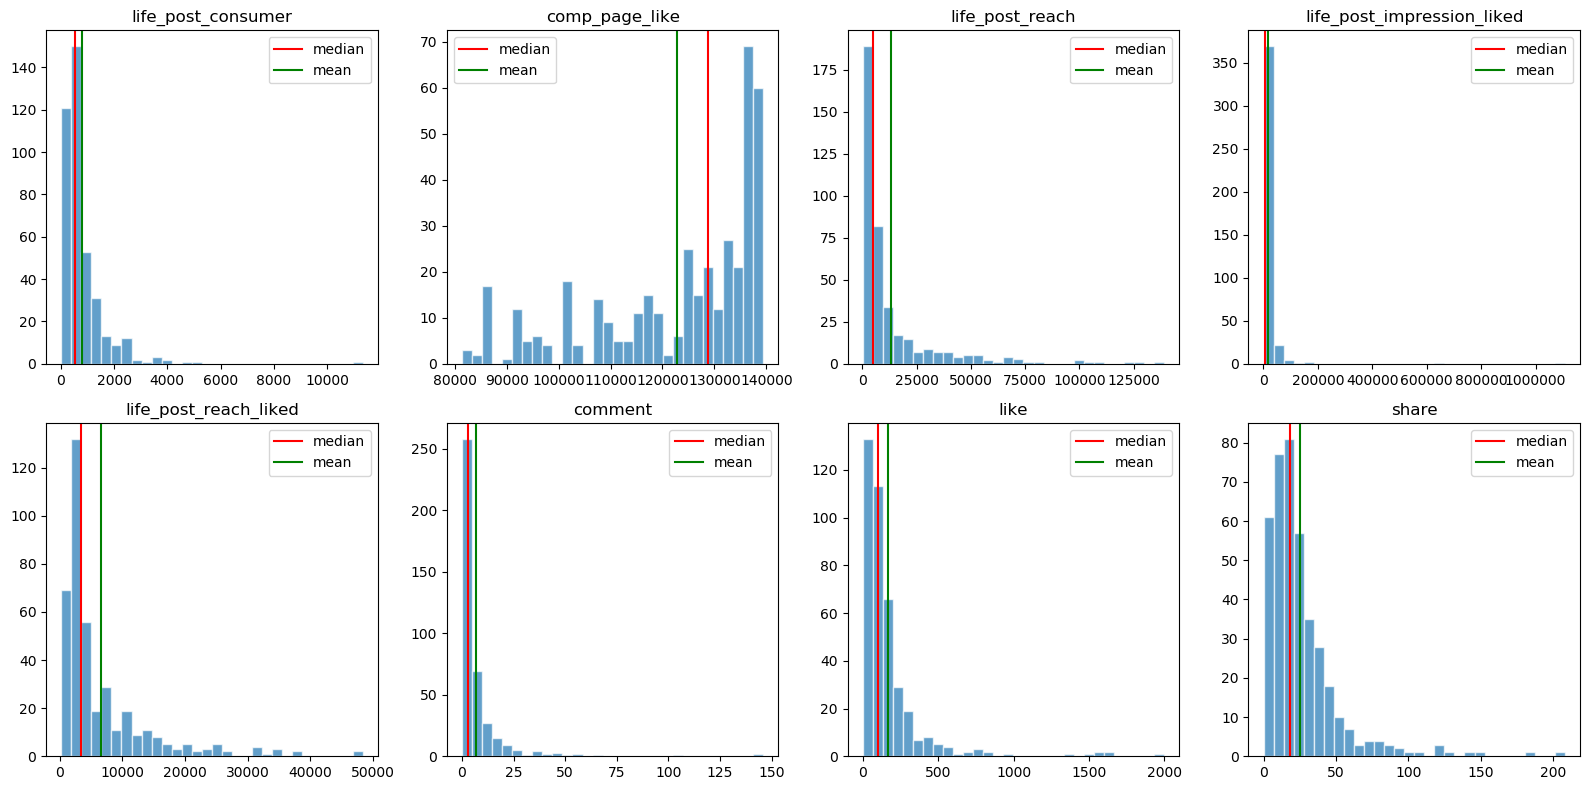

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')
all_best_rmse = [] # to collect all best RMSEs in all cases, and report them in Q11

df = pd.read_csv('df1_train.csv')

y = ['life_post_consumer']
key_variables = ['comp_page_like', 'Paid', \
                 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', \
                 'comment', 'like', 'share', \
                 'type_link', 'type_status', 'type_video', \
                 'cat2', 'cat3', \
                 'month1', 'month2', 'month3', 'month4', 'month5', 'month6', 'month7', 'month8', 'month9', 'month10', 'month11', \
                 'dow1', 'dow2', 'dow3', 'dow4', 'dow5', 'dow6', \
                 'hour2', 'hour3', 'hour4', 'hour5', 'hour6', 'hour7', 'hour8', 'hour9', 'hour10', 'hour11', 'hour12', 'hour13', 'hour14']

# Settings to see all columns
pd.set_option('display.max_columns', df.shape[1])

# Summary Statistics
print('Check out the summary statistics:')
display(df.describe().loc[['mean', 'std', '50%']])


# Graphical Exploration
print('Check out the distributions of all continuous variables:')
continuous_variables = [['life_post_consumer', 'comp_page_like', 'life_post_reach', 'life_post_impression_liked'], \
                        ['life_post_reach_liked', 'comment', 'like', 'share']]

## Create histograms
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

### zip continuous_variables with axes in an aligned way, and loop over the zipped object
for zipped_item in zip(continuous_variables, axes):
    for var, ax in zip(zipped_item[0], zipped_item[1]):
        ax.hist(df[var], bins=30, edgecolor='white', alpha=0.7)
        ax.set_title(var)
        ax.axvline(df[var].median(), color='red', label='median')
        ax.axvline(df[var].mean(), color='green', label='mean')
        ax.legend()

plt.tight_layout()
plt.show()
del df

From the histograms of all the continuous variables, we can see that nearly all of them are heavily right-skewed, except for the variable comp_page_like, which is heavily left-skewed. This highlights the characteristic of the dataset that the features aren't normally distributed.

#### Q2 (Case 1)
**Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?**

Simply use the mean of y in the training data as predictions, and calculate RMSE

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# TRAINING DATA
# Read in the training data
train = pd.read_csv('df1_train.csv')

# TEST DATA
# Read in the true outcome values of y, and cast it to a 1 x 50 numpy array
Y_test = np.array(pd.read_csv('df1_test1y.csv')).reshape(1, 50)[0]

# Set the predictions to be the mean of y in the training data, and also cast it to a 1 x 50 numpy array
ypred1 = np.array([train['life_post_consumer'].mean()] * 50).reshape(1, 50)[0]

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(Y_test, ypred1))

print(f'The test RMSE is {rmse}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred1[:20]},\n')
print(f'and the true outcome values are:\n {Y_test[:20]}')
all_best_rmse.append(rmse) # collect the rmse

The test RMSE is 928.8095109332162

For the first 20 data points in the testing data, 

the predictions are:
 [810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


#### Q3 (Case 2A)
**Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

Use OLS regression to make predictions, and calculate RMSE

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# OLS REGRESSION MODEL
reg = LinearRegression().fit(X, y)
ypred2 = reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, ypred2))

print(f'The test RMSE is {rmse}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred2[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(rmse) # collect the rmse

The test RMSE is 692.2891271362014

For the first 20 data points in the testing data, 

the predictions are:
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


#### Q4 (Case 2B)
**Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

"De-mean" the y, use OLS regression to make predictions, and calculate RMSE

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)

# OLS REGRESSION MODEL
reg = LinearRegression().fit(X, y)
ypred3 = reg.predict(X_test)
ypred3 += y_mean # reverse DEMEAN

rmse = np.sqrt(mean_squared_error(Y_test, ypred3))

print(f'The test RMSE is {rmse}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred3[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(rmse) # collect the rmse

The test RMSE is 692.2891271361826

For the first 20 data points in the testing data, 

the predictions are:
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


#### Q5 (Case 2C)
**Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?**

Standardize all features for both training and testing data, "de-mean" the y, use OLS regression to make predictions, and calculate RMSE

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# Standardize all features in X
train_scaler = StandardScaler()
train_scaler.fit_transform(X)

# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# Standardize all features in X_test
test_scaler = StandardScaler()
test_scaler.fit_transform(X_test)

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)

# OLS REGRESSION MODEL
reg = LinearRegression().fit(X, y)
ypred4 = reg.predict(X_test)
ypred4 += y_mean # reverse DEMEAN

rmse = np.sqrt(mean_squared_error(Y_test, ypred4))

print(f'The test RMSE is {rmse}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred4[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(rmse) # collect the rmse

The test RMSE is 692.2891271361826

For the first 20 data points in the testing data, 

the predictions are:
 [ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


#### Q6 (Case 3A)
**Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?**

Use Ridge regression to make predictions with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000, and calculate RMSE

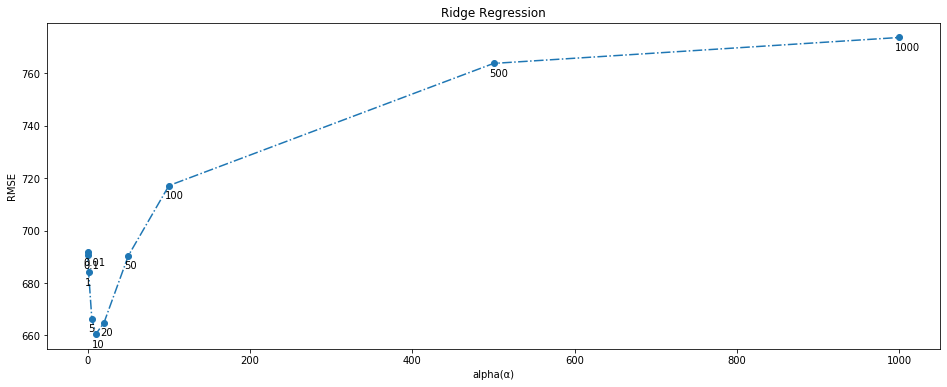

best_alpha = 10 and in_rmse = 660.5612900111673
The best test RMSE is 660.5612900111673 when the alpha(α) is 10

For the first 20 data points in the testing data, 

the predictions are:
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# Ridge REGRESSION MODEL with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse = []
for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X, y)
    ypred5 = reg.predict(X_test)
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, ypred5)))

# PLOT RMSEs against alphas
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(alphas, rmse, ls='-.', marker='o')
ax.set_title('Ridge Regression')
ax.set_xlabel('alpha(α)')
ax.set_ylabel('RMSE')

# FIND the BEST ALPHA and ADD ANNOTATIONS to the plot
best_alpha, min_rmse = 0, min(rmse)
for a, r in zip(alphas,rmse):
    corr = -5 # adds a little correction to put annotation in marker's centrum
    ax.annotate(a,  xy=(a + corr, r + corr))
    
    if r == min_rmse:
        best_alpha = a # find the best alpha

plt.show()
        
print(f'best_alpha = {best_alpha} and in_rmse = {min_rmse}')

# Ridge REGRESSION MODEL with best α
reg = Ridge(alpha=best_alpha)
reg.fit(X, y)
ypred5 = reg.predict(X_test)

print(f'The best test RMSE is {min_rmse} when the alpha(α) is {best_alpha}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred5[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(min_rmse) # collect the min rmse 

#### Q7 (Case 3B)
**Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?**

Standardize only "continuous" features for both training and testing data, "de-mean" the y, use Ridge regression to make predictions with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000, and calculate RMSE

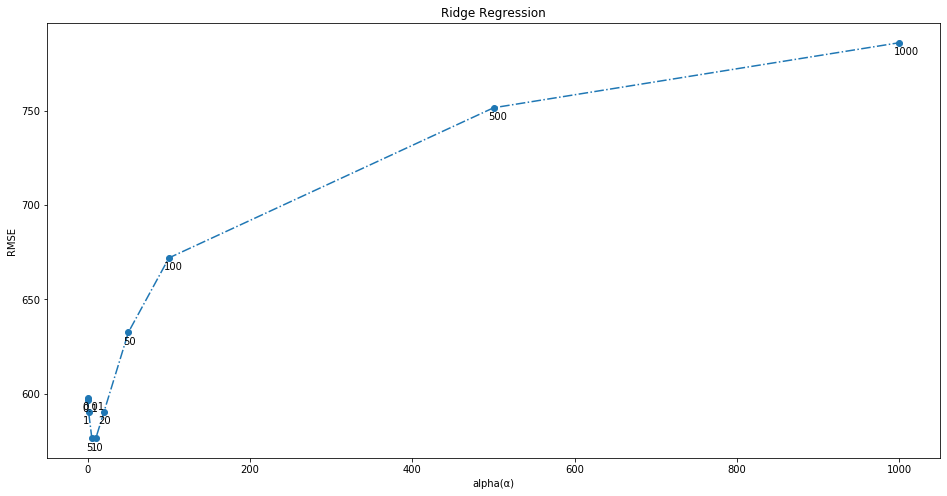

best_alpha = 5 and min_rmse = 576.5394579168046
The best test RMSE is 576.5394579168046 when the alpha(α) is 5

For the first 20 data points in the testing data, 

the predictions are:
 [ 798.92069972  241.29245284 2039.74989722 -142.89347701  492.55513359
  566.81866207  366.33144443  595.64920734  467.5112492   420.63688384
  482.24766549  362.96885313  654.26546959  523.1465671   210.04139992
  586.64675728 1712.90961736 2793.2365402  2875.05369807 3109.15131862],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

x_continue = ['comp_page_like', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share']

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

# Standardize all "continuous" features in train
train_scaler = StandardScaler()
train[x_continue] = train_scaler.fit_transform(train[x_continue])

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)


# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# Standardize all features in X_test
test_scaler = StandardScaler()
X_test[x_continue] = test_scaler.fit_transform(X_test[x_continue])


# Ridge REGRESSION MODEL with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse = []
for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X, y)
    ypred6 = reg.predict(X_test)
    ypred6 += y_mean # reverse DEMEAN
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, ypred6)))

    
# PLOT RMSEs against alphas
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(alphas, rmse, ls='-.', marker='o')
ax.set_title('Ridge Regression')
ax.set_xlabel('alpha(α)')
ax.set_ylabel('RMSE')


# FIND the BEST ALPHA and ADD ANNOTATIONS to the plot
best_alpha, min_rmse = 0, min(rmse)
for a, r in zip(alphas,rmse):
    corr = -6.5 # adds a little correction to put annotation in marker's centrum
    ax.annotate(a,  xy=(a + corr, r + corr))
    
    if r == min_rmse:
        best_alpha = a # find the best alpha

plt.show()

print(f'best_alpha = {best_alpha} and min_rmse = {min_rmse}')

# Ridge REGRESSION MODEL with best α
reg = Ridge(alpha=best_alpha)
reg.fit(X, y)
ypred6 = reg.predict(X_test)
ypred6 += y_mean # reverse DEMEAN

print(f'The best test RMSE is {min_rmse} when the alpha(α) is {best_alpha}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred6[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(min_rmse) # collect the min rmse 

#### Q8 (Case 3C)
**Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?**

"De-mean" the y, use Ridge regression to make predictions with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000, and calculate RMSE

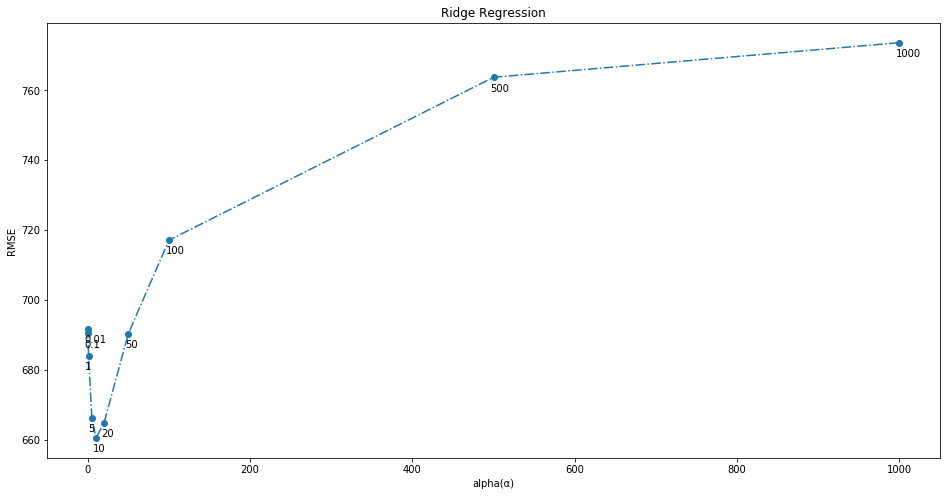

best_alpha = 10 and min_rmse = 660.5612900111672
The best test RMSE is 660.5612900111672 when the alpha(α) is 10

For the first 20 data points in the testing data, 

the predictions are:
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)


# TESTING DATA
## Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
## Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')


# Ridge REGRESSION MODEL with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse = []
for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X, y)
    ypred7 = reg.predict(X_test)
    ypred7 += y_mean # reverse DEMEAN
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, ypred7)))

    
# PLOT RMSEs against alphas
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(alphas, rmse, ls='-.', marker='o')
ax.set_title('Ridge Regression')
ax.set_xlabel('alpha(α)')
ax.set_ylabel('RMSE')


# FIND the BEST ALPHA and ADD ANNOTATIONS to the plot
best_alpha, min_rmse = 0, min(rmse)
for a, r in zip(alphas,rmse):
    corr = -4 # adds a little correction to put annotation in marker's centrum
    ax.annotate(a,  xy=(a + corr, r + corr))
    
    if r == min_rmse:
        best_alpha = a # find the best alpha

plt.show()

print(f'best_alpha = {best_alpha} and min_rmse = {min_rmse}')

# Ridge REGRESSION MODEL with best α
reg = Ridge(alpha=best_alpha)
reg.fit(X, y)
ypred7 = reg.predict(X_test)
ypred7 += y_mean # reverse DEMEAN

print(f'The best test RMSE is {min_rmse} when the alpha(α) is {best_alpha}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred7[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(min_rmse) # collect the min rmse 

#### Q9 (Case 3D)
**Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?**

Standardize all features for both training and testing data, "de-mean" the y, use Ridge regression to make predictions with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000, and calculate RMSE

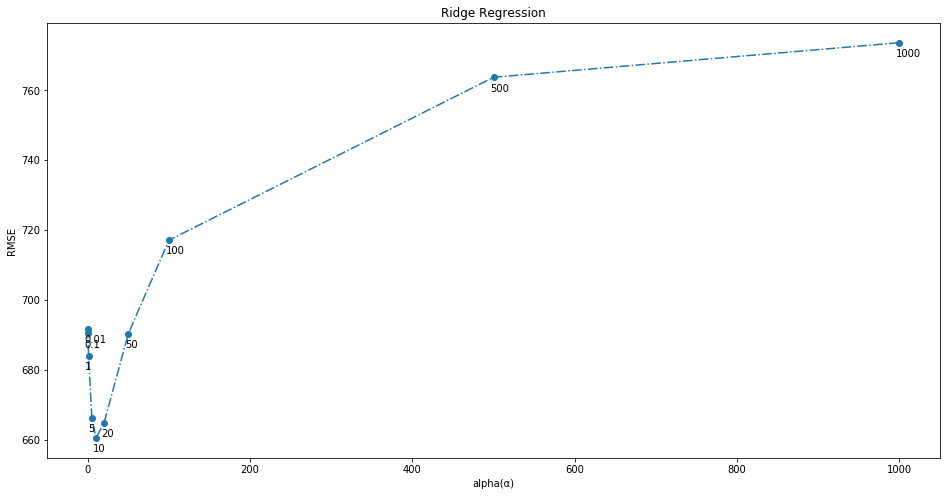

best_alpha = 10 and min_rmse = 660.5612900111672
The best test RMSE is 660.5612900111672 when the alpha(α) is 10

For the first 20 data points in the testing data, 

the predictions are:
 [1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline


# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# Standardize all features in X
train_scaler = StandardScaler()
train_scaler.fit_transform(X)

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)


# TESTING DATA
## Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
## Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# Standardize all features in X_test
test_scaler = StandardScaler()
test_scaler.fit_transform(X_test)


# Ridge REGRESSION MODEL with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse = []
for alpha in alphas:
    reg = Ridge(alpha=alpha).fit(X, y)
    ypred8 = reg.predict(X_test)
    ypred8 += y_mean # reverse DEMEAN
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, ypred8)))

    
# PLOT RMSEs against alphas
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(alphas, rmse, ls='-.', marker='o')
ax.set_title('Ridge Regression')
ax.set_xlabel('alpha(α)')
ax.set_ylabel('RMSE')


# FIND the BEST ALPHA and ADD ANNOTATIONS to the plot
best_alpha, min_rmse = 0, min(rmse)
for a, r in zip(alphas,rmse):
    corr = -4 # adds a little correction to put annotation in marker's centrum
    ax.annotate(a,  xy=(a + corr, r + corr))
    
    if r == min_rmse:
        best_alpha = a # find the best alpha

plt.show()

print(f'best_alpha = {best_alpha} and min_rmse = {min_rmse}')

# Ridge REGRESSION MODEL with best α
reg = Ridge(alpha=best_alpha)
reg.fit(X, y)
ypred8 = reg.predict(X_test)
ypred8 += y_mean # reverse DEMEAN

print(f'The best test RMSE is {min_rmse} when the alpha(α) is {best_alpha}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred8[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(min_rmse) # collect the min rmse 

#### Q10 (Case 4) 
**Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?**

Standardize only "continuous" features for both training and testing data, "de-mean" the y, use Lasso regression to make predictions with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000, and calculate RMSE

D:\Aanaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14863924, tolerance: 32249.892376
  positive)
D:\Aanaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.676012307, tolerance: 32249.892376
  positive)


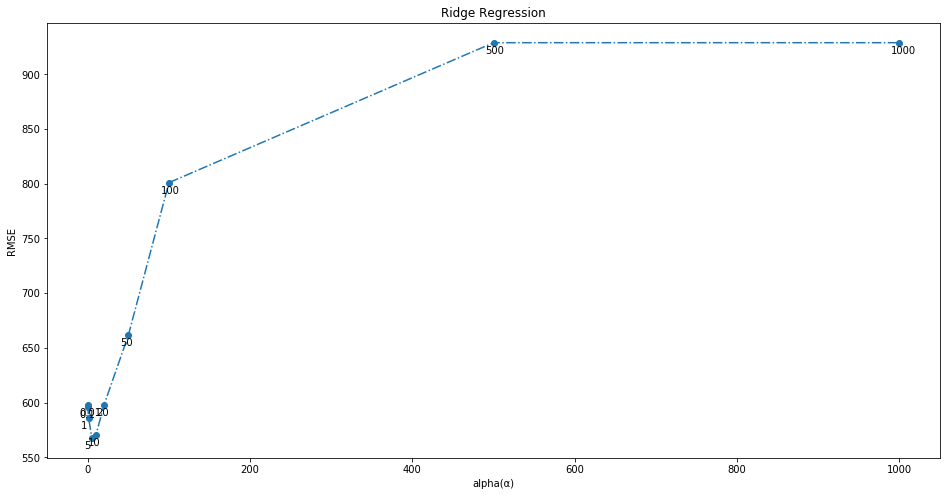

best_alpha = 5 and min_rmse = 567.6106961504183
The best test RMSE is 567.6106961504183 when the alpha(α) is 5

For the first 20 data points in the testing data, 

the predictions are:
 [ 892.16845262  296.72079003 2169.43235931 -138.0557692   432.07400561
  618.35661535  336.81039683  502.87420232  539.16881931  468.27055704
  398.78217568  392.28162124  804.3444494   510.46489677  170.99111751
  571.09863405 1780.56001087 2852.86755286 2909.9169738  3036.04754454],

and the true outcome values are:
 [1183  189 2327   76  354  713  204  288  555  586  446  884  524  672
   23  570 1361 5934 2319 1633]


In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

x_continue = ['comp_page_like', 'life_post_reach', 'life_post_impression_liked', 'life_post_reach_liked', 'comment', 'like', 'share']

# TRAINING DATA
# Read in the training data, and divide them into features and a target column
train = pd.read_csv('df1_train.csv')

# Standardize all "continuous" features in train
train_scaler = StandardScaler()
train[x_continue] = train_scaler.fit_transform(train[x_continue])

X = train.iloc[:, 1:] # all features in train
y = train['life_post_consumer'] # target column in train

# DEMEAN
y_mean = y.mean()
y = y.apply(lambda element: element - y_mean)


# TESTING DATA
# Read in the features in testing data
X_test = pd.read_csv('df1_test1.csv')
# Read in the true outcome values for y in testing data
Y_test = pd.read_csv('df1_test1y.csv')

# Standardize all features in X_test
test_scaler = StandardScaler()
X_test[x_continue] = test_scaler.fit_transform(X_test[x_continue])


# Ridge REGRESSION MODEL with α = 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000
alphas = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
rmse = []
for alpha in alphas:
    reg = Lasso(alpha=alpha).fit(X, y)
    ypred9 = reg.predict(X_test)
    ypred9 += y_mean # reverse DEMEAN
    
    rmse.append(np.sqrt(mean_squared_error(Y_test, ypred9)))

    
# PLOT RMSEs against alphas
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(alphas, rmse, ls='-.', marker='o')
ax.set_title('Ridge Regression')
ax.set_xlabel('alpha(α)')
ax.set_ylabel('RMSE')


# FIND the BEST ALPHA and ADD ANNOTATIONS to the plot
best_alpha, min_rmse = 0, min(rmse)
for a, r in zip(alphas,rmse):
    corr = -10 # adds a little correction to put annotation in marker's centrum
    ax.annotate(a,  xy=(a + corr, r + corr))
    
    if r == min_rmse:
        best_alpha = a # find the best alpha

plt.show()

print(f'best_alpha = {best_alpha} and min_rmse = {min_rmse}')

# Ridge REGRESSION MODEL with best α
reg = Lasso(alpha=best_alpha)
reg.fit(X, y)
ypred9 = reg.predict(X_test)
ypred9 += y_mean # reverse DEMEAN

print(f'The best test RMSE is {min_rmse} when the alpha(α) is {best_alpha}', end='\n\n')
print('For the first 20 data points in the testing data, \n')
print(f'the predictions are:\n {ypred9[:20]},\n')
print(f'and the true outcome values are:\n {np.array(Y_test[:20]).reshape(1, 20)[0]}')
all_best_rmse.append(min_rmse) # collect the min rmse 

#### Q11
**Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?**

My answer will be provided in three parts:<br><br>
&emsp;&emsp; 1. &emsp;Summarize the best RMSE of all cases<br>
&emsp;&emsp; 2. &emsp;Discuss my findings<br>
&emsp;&emsp; 3. &emsp;How should we proprocess the features<br>
<br>
Here is a quick review of all cases, the **"Case Info Table"**:<br>

|Case|Method|x_continue|x_binary|y|
|---|---|---|---|---|
|1|ymean|not used|not used|keep|
|2A|OLS|keep|keep|keep|
|2B|OLS|keep|keep|de-mean|
|2C|OLS|std.|std.|de-mean|
|3A|Ridge|keep|keep|keep|
|3B|Ridge|	std.|keep|de-mean|
|3C|Ridge|keep|keep|de-mean|
|3D|Ridge|std.|std.|de-mean|
|4|Lasso|std.|keep|de-mean|

#### 1. Summarize the best RMSE of all cases
Create a barplot to compare the RMSE of all cases:

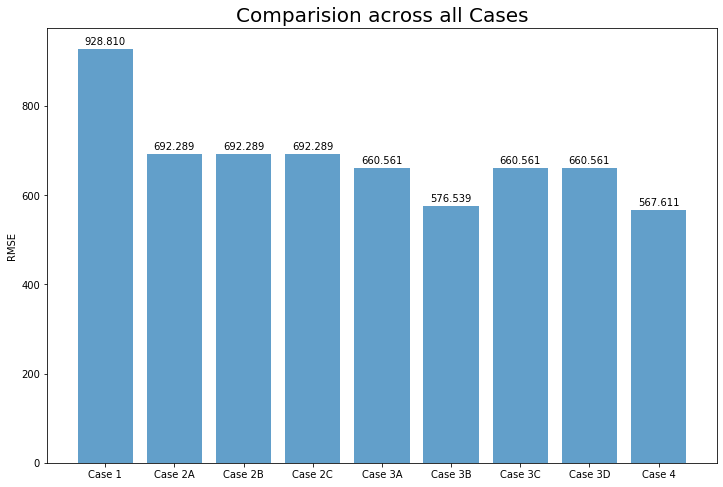

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create a barplot to compare all cases
cases = ['Case 1', 'Case 2A', 'Case 2B', 'Case 2C', 'Case 3A', 'Case 3B', 'Case 3C', 'Case 3D', 'Case 4']

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(cases, all_best_rmse, alpha=0.7)
ax.set_title('Comparision across all Cases', size=20)
ax.set_ylabel('RMSE')

# ADD labels to bars
rects = ax.patches

# Make some labels
for rect, rmse in zip(rects, all_best_rmse):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, f'{rmse:.3f}', ha='center', va='bottom')
    
plt.show()

#### 2. Discuss my findings
Here I would like to derive my findings by making several comparisons between cases.<br>
##### (a) De-mean matters little
First of all, let's focus on case 2A and 2B. We can see that while the y is de-meaned in case 2B, both cases have the same RMSE. This brings us to the conclusion that **whether we de-mean y or not does not affect the outcome**. Such conclusion can be supported also by comparing case 3A and 3C.
##### (b) Standardizing all features is pointless
Secondly, let's shift our focus to case 2B and 2C.  We can see that even though all features are standardized in case 2C, both cases have the same RMSE. This leads to our second conclusion that **standardizing all features has no effect on the outcome**. We can again find proof to it when we make similar comparisons between case 3C and 3D.
##### (c) Standardizing only the continuous features is the key
Finally, from the above two conclusion, we can now be sure that case 3A, 3C, and 3D is the same in terms of preprocessing, because they either keep all features or standardize all features, the de-meaning of y in case 3C and 3D takes no effect as well. Now, considering case 3B, which outperforms the above three, we can be certain that **standardizing only continuous features leads to a much better result**.
##### (d) Model Performance: Lasso > Ridge > OLS > ymean
Comparing case 4 and case 3B, we can see that the Lasso model performs slightly better than the Ridge model.<br>
Comparing case 3A and case 2A, we can tell that the Ridge model performs better than the OLS model.<br>
And finally, it is obvious that case 1, which naively uses ymean to predict y, results in the worst performance.

#### 3. How should we proprocess the features?
According to the above findings (a, b, and c), it is clear that our **best strategy for preprocessing the features is to standardize ONLY the continuous features!**